# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados
Autor: Miguel Cardoso

Dataset: MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [ ]:
# Importação de blibliotecas

import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [ ]:
# Verificando se o caminho existe

caminho = r'C:\Users\MIGUEL\OneDrive\Programação\Arquivos_Programação\Arquivos_Programação_EBAC\Estatistica1\MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv'

if os.path.exists(caminho):
    print("O caminho foi encontrado!")
else:
    print("O caminho não foi encontrado.")

df = pd.read_csv(caminho)

df = pd.read_csv(caminho, delimiter=',')

df.head(10)

O caminho foi encontrado!


,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# Tratamento de dados
Após uma análise, descobri a presença de sequencias de valores nulos que atrapalhariam a análise dos dados, logo, tomei a liberdade para tratá-los.

In [5]:
df.drop_duplicates(inplace=True) # Comecei removendo as duplicatas se tivesse

# Agora vou remover as linhas que o preço_normal, Preço_desconto e Preço_anterior tiverem silmultenamente os seu valores nulos

antes = df.shape[0]
df = df[~((df['Preco_Normal'] == 0) & 
          (df['Preco_Desconto'] == 0) & 
          (df['Preco_Anterior'] == 0))]
depois = df.shape[0]
print(f"{antes - depois} linhas foram removidas.")


49 linhas foram removidas.


# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [8]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3310.976744
5,lacteos,2508.689412
2,congelados,2153.869565
0,belleza-y-cuidado-personal,1877.841410
3,frutas,1724.473684
6,verduras,1457.135593
4,instantaneos-y-sopas,823.264151


In [9]:
#Seu código aqui para a mediana
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by="Preco_Normal", ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3490.0
0,belleza-y-cuidado-personal,1659.0
2,congelados,1565.0
6,verduras,1250.0
3,frutas,1195.0
5,lacteos,1159.0
4,instantaneos-y-sopas,579.0


Digite aqui as categorias:

Média muito abaixo abaixo: Não tem nenhuma catogoria onde a média esteja muito abaixo da mediana, apenas comidas-preparadas que está um pouco abaixo

Média muito acima da mediana: Todas as outras categorias estão acima, mas algumas estão muito acima, sendo elas, lacteos, congelados e frutas 

Conclusão: Em nenhum dos casos a média e a mediana foram exatamente iguais, e em apenas um caso a média foi menor que a mediana (E não foi um valor muito expressivo ou alarmante), já em médias maiores que a mediana a situação é outra, já que foi a maioria dos casos, e 3 categorias específicas a diferença foi muito grande, o que indica que é recomendável uma análise para possíveis outliers.

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [12]:
#Seu código aqui
df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
5,lacteos,3987.635218
0,belleza-y-cuidado-personal,2228.405569
2,congelados,2111.116685
1,comidas-preparadas,1907.747656
3,frutas,1639.151114
4,instantaneos-y-sopas,1194.282149
6,verduras,972.230682


Digite nesse campo o comportamento que você identificou.

A diferença é que quanto maior é o desvio padrão, maior é a diferença entre a mediana e a média.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

In [21]:
#Seu código aqui
df_lacteos = df.loc[df['Categoria'] == 'lacteos']
fig = px.box(
    df_lacteos,
    y='Preco_Normal',
    points='all',
    title='Distribuição do Preço Normal – Categoria lacteos',
    labels={'Preco_Normal': 'Preço Normal (Pesos chilenos)'},
    template='plotly_white',
)

fig.update_traces(marker_color='skyblue', boxpoints='all', jitter=0.3)
fig.update_layout(
    width=1500,
    height=500,
    title_font_size=22,
    yaxis_title='Preço Normal (CLP)',
    plot_bgcolor='white',
    yaxis_showgrid=True,
    yaxis_gridcolor='lightgrey'
)

fig.show()

Com base no gráfico fica evidente que o motivo do devio padrão alto é a grande quantidade de outliers, alguns produtos que valem muito...

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'congelados'),
  Text(1, 0, 'belleza-y-cuidado-personal'),
  Text(2, 0, 'comidas-preparadas'),
  Text(3, 0, 'lacteos'),
  Text(4, 0, 'frutas'),
  Text(5, 0, 'instantaneos-y-sopas'),
  Text(6, 0, 'verduras')])

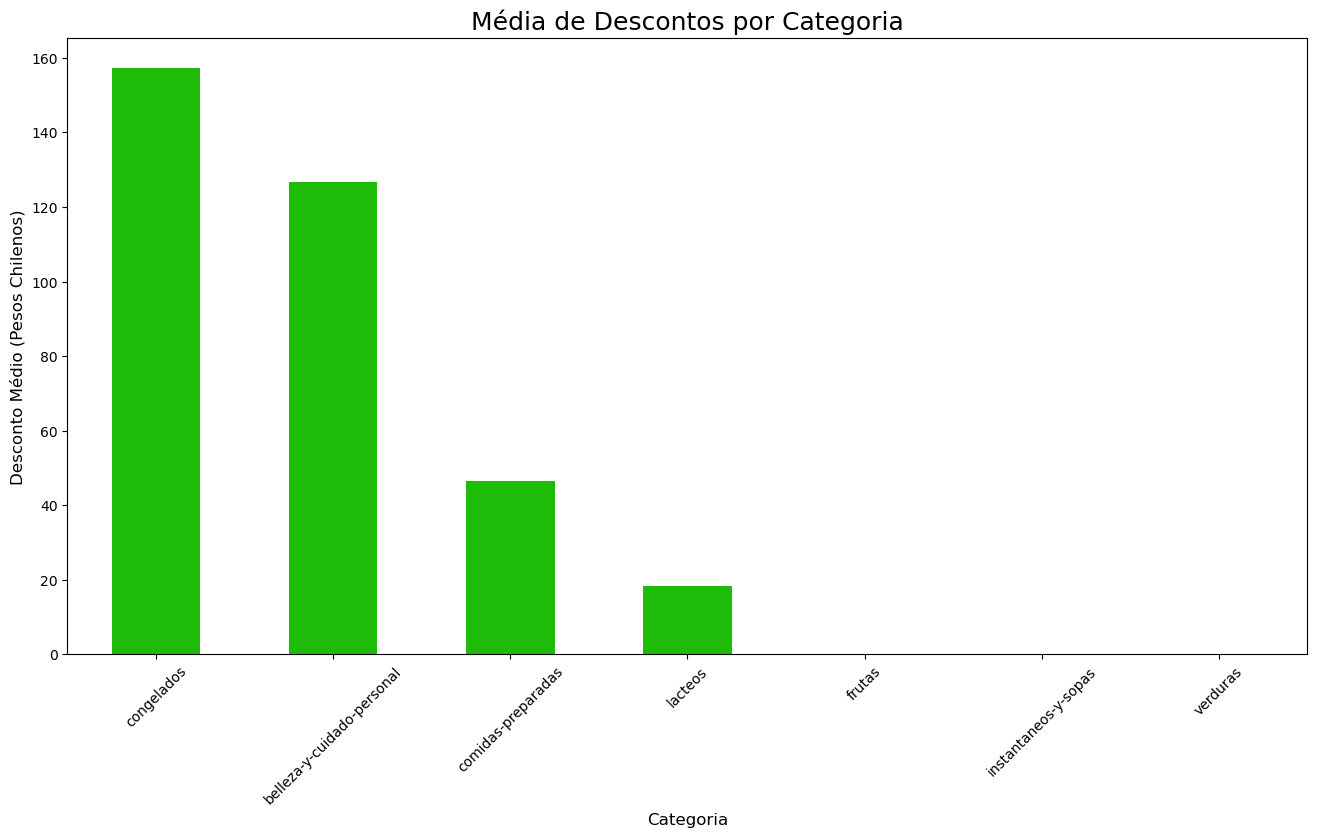

In [ ]:
# Seu código aqui
media_desconto = df.groupby('Categoria')['Desconto'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 8))
media_desconto.plot(kind='bar', color="#1EBB09") 
plt.title('Média de Descontos por Categoria', fontsize=18,)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Desconto Médio (Pesos Chilenos)', fontsize=12)
plt.xticks(rotation=45)

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [51]:
desconto_por_categoria_marca = (df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index().rename(columns={'Desconto': 'media_desconto'}))


desconto_por_categoria_marca['media_desconto_plot'] = desconto_por_categoria_marca['media_desconto'] + 0.01

fig = px.treemap(
    desconto_por_categoria_marca,
    path=['Categoria', 'Marca'],
    values='media_desconto_plot',
    color='media_desconto',
    color_continuous_scale='Tealgrn',
    title='Média de Desconto por Categoria e Marca'
)
fig.update_layout(
    width=1200,
    height=600,
    title_font_size=24
)
fig.show()

# CONCLUSÃO 

Através da análise visual conseguimos identificar insights importantes sobre o comportamento dos preços e descontos aplicados.

- Produtos com maiores preços normais se concentram em categorias específicas.
- O percentual de desconto varia bastante entre categorias, com algumas se destacando claramente.